In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from mapclassify import classify

In [2]:
estados = gpd.read_file(r"https://raw.githubusercontent.com/BobadillaE/Pobreza_Mexico_RStudio/main/Datasets%20empleados/formatted4.json")
municipios = gpd.read_file(r"https://raw.githubusercontent.com/angelnmara/geojson/master/MunicipiosMexico.json")
pd_df = pd.read_csv(r"https://raw.githubusercontent.com/BobadillaE/Pobreza_Mexico_RStudio/main/Datasets%20empleados/DF_MX.xlsx%20-%20Hoja1.csv")

In [3]:
merged = pd.merge(estados, pd_df, on='id')

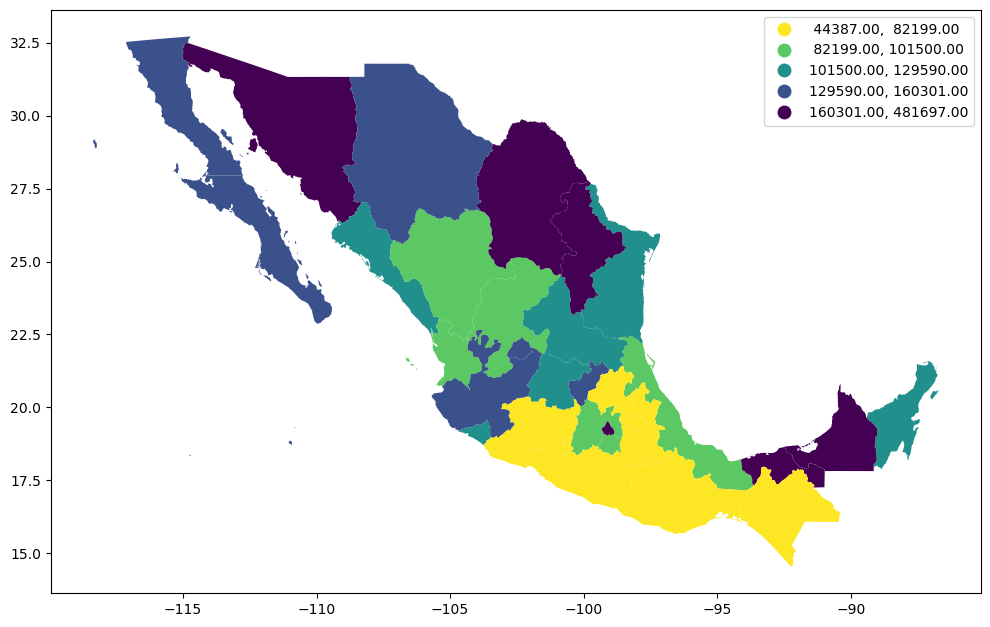

In [4]:
fig, ax = plt.subplots()
merged.plot(column='pibPC', legend=True, scheme='quantiles', k=5, cmap='viridis_r', ax=ax)
fig.set_size_inches(12, 8)



# **Recuadro de acercamiento**

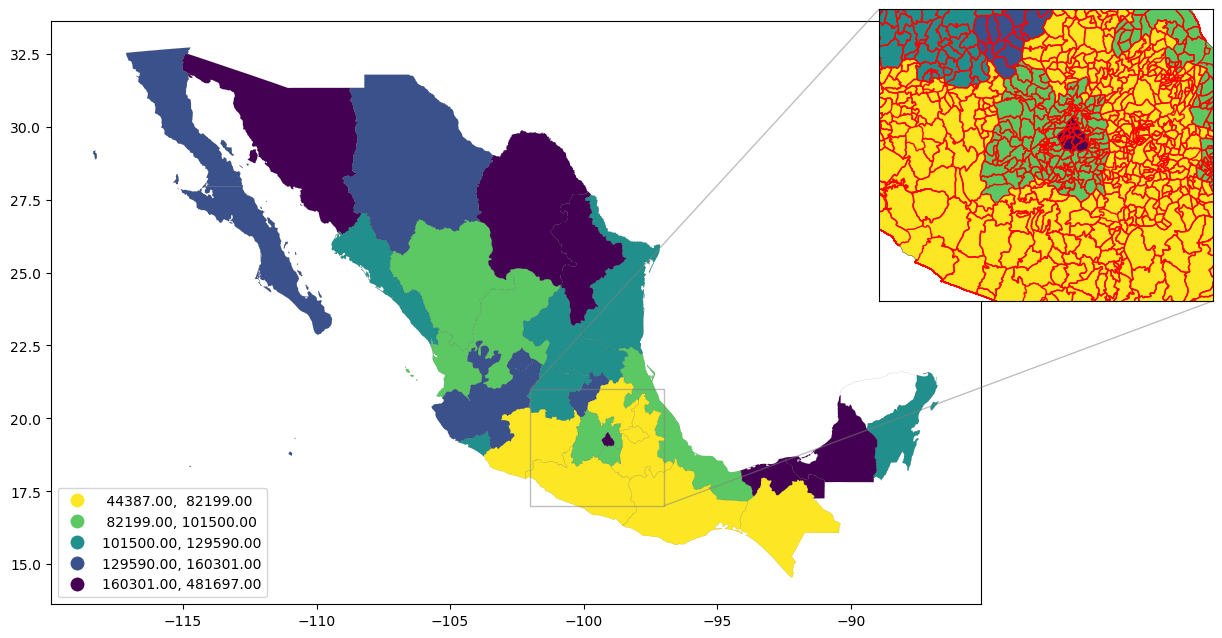

In [5]:
fig, ax = plt.subplots()
# Añade recuadro
axins = ax.inset_axes([0.82, 0.52, 0.5, 0.5])

# Gráfica principal
merged.plot(column='pibPC', legend=True, ax=ax, scheme='quantiles', k=5, cmap='viridis_r', legend_kwds={'loc': 'lower left'})
estados.boundary.plot(lw=0.05, color='k', ax=ax)

# Gráfica recuadro
merged.plot(column='pibPC', legend=False, ax=axins, scheme='quantiles', k=5, cmap='viridis_r')
estados.boundary.plot(lw=0.25, color='k', ax=axins)
municipios.boundary.plot(lw=1, color='red', ax=axins)

# limita área a mostrar
axins.set(ylabel='', xlabel='', xlim=(-102, -97), ylim=(17, 21), xticks=[], yticks=[])

# Establece líneas del recuadro a la gráfica principal
ax.indicate_inset_zoom(axins)

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/2926047497.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.plot(lw=1, color='red', ax=axins2)


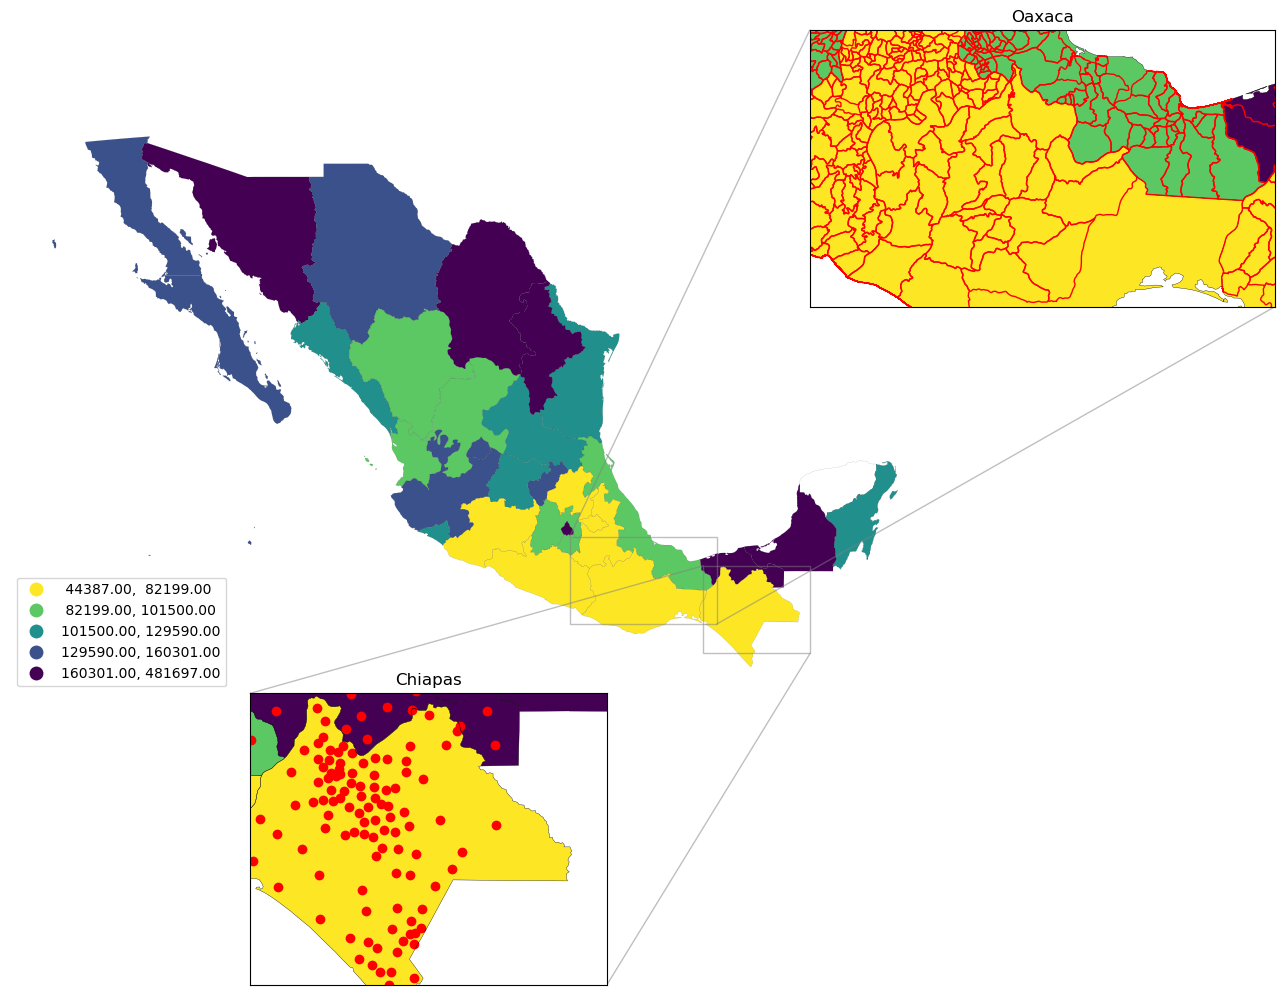

In [6]:
fig, ax = plt.subplots()
# Añade recuadro 1
axins = ax.inset_axes([0.86, 0.65, 0.5, 0.5])
# Añade recuadro 2
axins2 = ax.inset_axes([0.2, -0.5, 0.5, 0.5])

# Gráfica principal
merged.plot(column='pibPC', legend=True, ax=ax, scheme='quantiles', k=5, cmap='viridis_r', legend_kwds={'loc': 'lower left'})
estados.boundary.plot(lw=0.05, color='k', ax=ax)

# Gráfica recuadro 1
merged.plot(column='pibPC', legend=False, ax=axins, scheme='quantiles', k=5, cmap='viridis_r')
estados.boundary.plot(lw=0.25, color='k', ax=axins)
municipios.boundary.plot(lw=1, color='red', ax=axins)

# Gráfica recuadro 2
merged.plot(column='pibPC', legend=False, ax=axins2, scheme='quantiles', k=5, cmap='viridis_r')
merged.boundary.plot(lw=0.25, color='k', ax=axins2)
municipios.centroid.plot(lw=1, color='red', ax=axins2)

# limita área a mostrar recuadro 1 y 2
axins.set(ylabel='', xlabel='', xlim=(-99, -93.5), ylim=(16, 19), xticks=[], yticks=[], title='Oaxaca')
axins2.set(ylabel='', xlabel='', xlim=(-94, -90), ylim=(15, 18), xticks=[], yticks=[], title='Chiapas')

# Elimina marco de la gráfica principal
ax.set_axis_off()
# Establece líneas de los recuadros a la gráfica principal
ax.indicate_inset_zoom(axins)
ax.indicate_inset_zoom(axins2)

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)

# **Recuadro de contexto**

In [7]:
jal= merged.query('id=="MX-JAL"')



In [8]:
jal.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,...,pibPC,total_viviendas,sinAlimentos,difAlimentos,lejaniaHospital,aguaDiaria,sinAfiliacion,rezagoEdu,estadoDerecho,techo
17,Jalisco,MX-JAL,Mexico,State,18.5,86.8,32,24,93.2,9.2,...,133857,2314882,9.2,39.9,32,86.8,24.0,18.5,37.0,93.2


/Users/elisagarciazafra/miniconda3/lib/python3.10/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  warnings.warn(


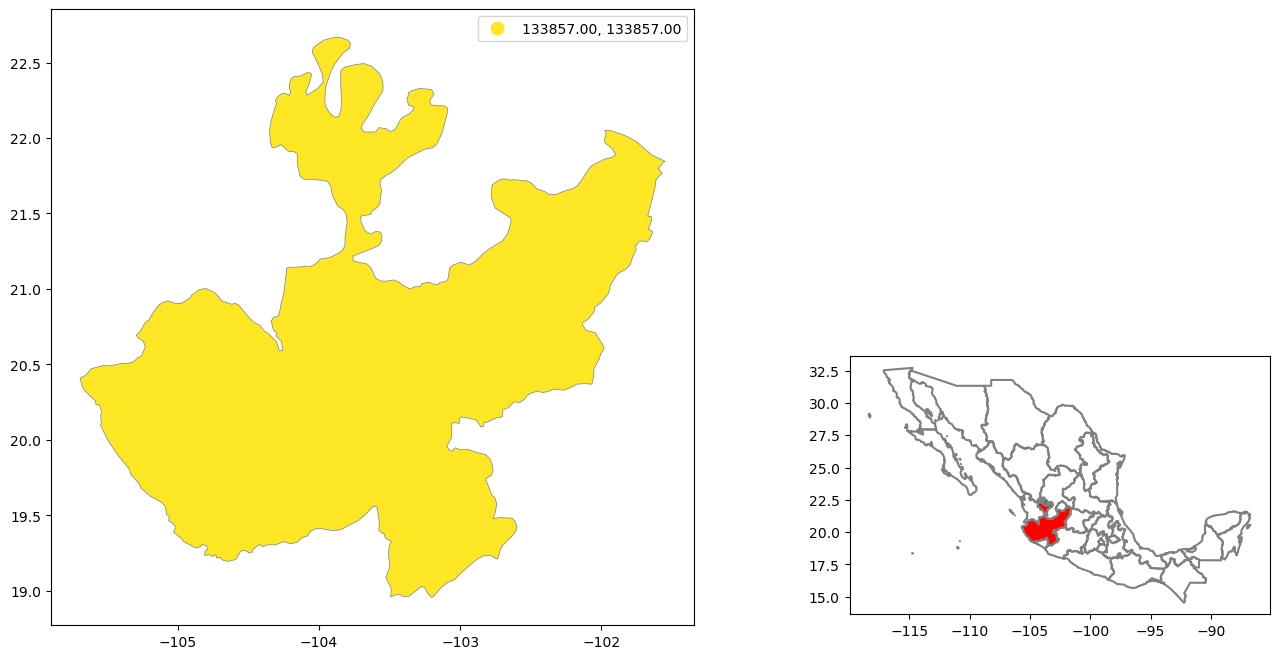

In [9]:
fig, ax = plt.subplots()
# Mapa principal
jal.plot(column='pibPC', legend=True, scheme='quantiles', k=5, cmap='viridis_r', ax=ax)
# Borde de los municipios
jal.boundary.plot(linewidth=0.5, color='gray', ax=ax)
# Inserta recuadro
ax_mex = fig.add_axes([0.91, 0.11, 0.35, 0.35], )
# Dibuja los estados del país en el recuadro
estados.boundary.plot(color='gray', ax=ax_mex)
# Resalta Oaxaca con el color rojo
merged.query('id=="MX-JAL"').plot(color='red', ax=ax_mex)
# Establece tamaño final
fig.set_size_inches(12, 8)



---



# **Algunos querys**

In [10]:
municipios.head()

,stroke,stroke-opacity,fill-opacity,NAME_0,NAME_1,NAME_2,geometry
0,#ff0000,1,0,Mexico,Aguascalientes,Aguascalientes,"POLYGON ((-102.44799 21.66107, -102.45526 21.6..."
1,#ff0000,1,0,Mexico,Aguascalientes,Asientos,"POLYGON ((-102.22901 22.04062, -102.22579 22.0..."
2,#ff0000,1,0,Mexico,Aguascalientes,Calvillo,"POLYGON ((-102.61303 21.72298, -102.61988 21.7..."
3,#ff0000,1,0,Mexico,Aguascalientes,Cosío,"POLYGON ((-102.25368 22.34621, -102.25368 22.3..."
4,#ff0000,1,0,Mexico,Aguascalientes,Jesús María,"POLYGON ((-102.57815 21.77031, -102.57864 21.7..."


<Axes: >

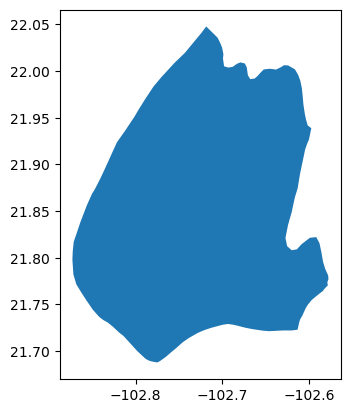

In [11]:
municipios.query('NAME_2=="Calvillo"').plot()

<Axes: >

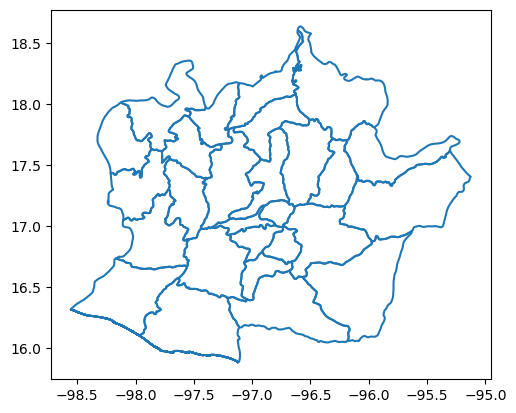

In [12]:
municipios.query('NAME_1=="Oaxaca"').boundary.plot()

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1342861843.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').centroid.plot(ax=municipios.query('NAME_1=="Jalisco"').boundary.plot(),color="black", markersize=5)


<Axes: >

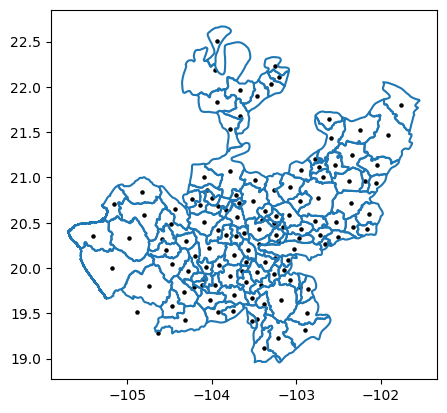

In [13]:
municipios.query('NAME_1=="Jalisco"').centroid.plot(ax=municipios.query('NAME_1=="Jalisco"').boundary.plot(),color="black", markersize=5)

# **Manipulaciones Geométricas**

## Buffer

`GeoSeries.buffer`


Returns a `GeoSeries` of geometries representing all points within a given distance of each geometric object.

**Buffer de los polígonos**

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/281454711.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5)


<Axes: >

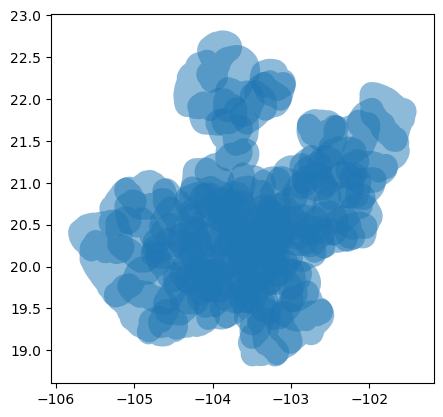

In [14]:
municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5)

**Buffer de los centroides**

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1234832177.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.35).plot(alpha = 0.5, color="red")
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1234832177.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.35).plot(alpha = 0.5, color="red")


<Axes: >

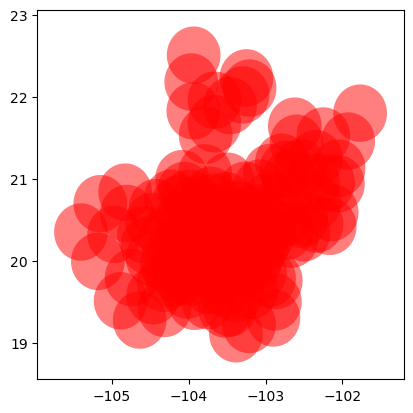

In [15]:
municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.35).plot(alpha = 0.5, color="red")

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1098176977.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red")
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1098176977.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red")
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1098176977.py:1: UserWarning: Geometry is in a geographic CRS. Result

<Axes: >

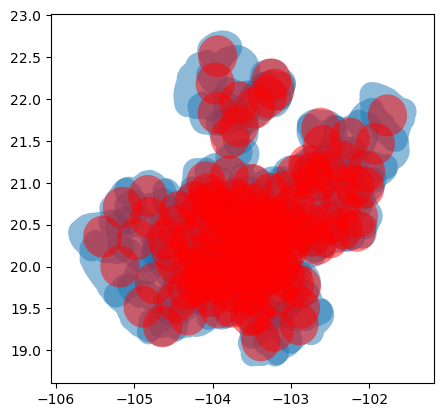

In [16]:
municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red")

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1372821270.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax= municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red"))
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1372821270.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax= municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red"))
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80672/1372821270.py:2: UserWarning: Geometry is in a geographic C

<Axes: >

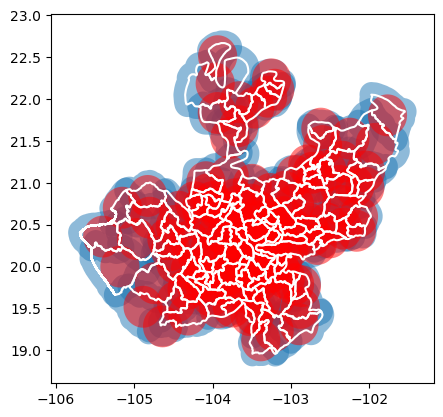

In [17]:
municipios.query('NAME_1=="Jalisco"').boundary.plot(color="white",
ax= municipios.query('NAME_1=="Jalisco"').centroid.buffer(0.25).plot(ax =municipios.query('NAME_1=="Jalisco"').buffer(0.15).plot(alpha = 0.5) ,alpha = 0.5, color="red"))

## Convex hull

`GeoSeries.convex_hull`

Returns a `GeoSeries` of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

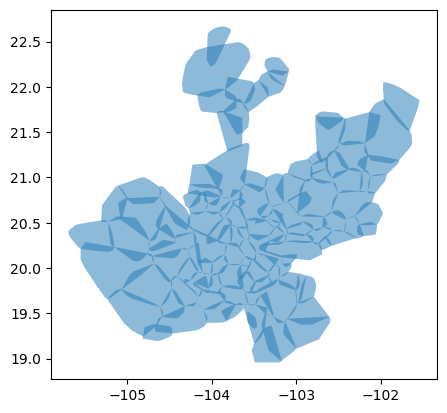

In [18]:
axis= municipios.query('NAME_1=="Jalisco"').convex_hull.plot(alpha = 0.5)

<Axes: >

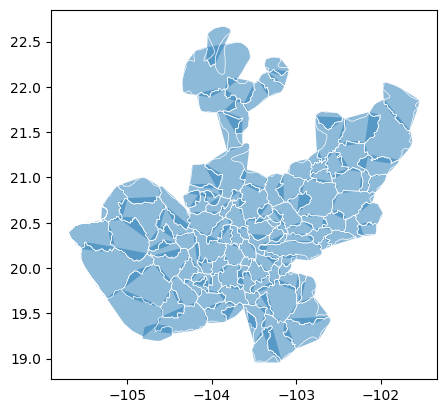

In [19]:
municipios.query('NAME_1=="Jalisco"').boundary.plot(ax=municipios.query('NAME_1=="Jalisco"').convex_hull.plot(alpha = 0.5), color="white", linewidth=0.5)



---



# **Intersecciones, uniones y diferencias**

In [20]:
pol1= gpd.read_file(r"https://raw.githubusercontent.com/BobadillaE/EmilianoBF/main/map.geojson")
pol2= gpd.read_file(r"https://raw.githubusercontent.com/BobadillaE/EmilianoBF/main/map%20(1).geojson")

<Axes: >

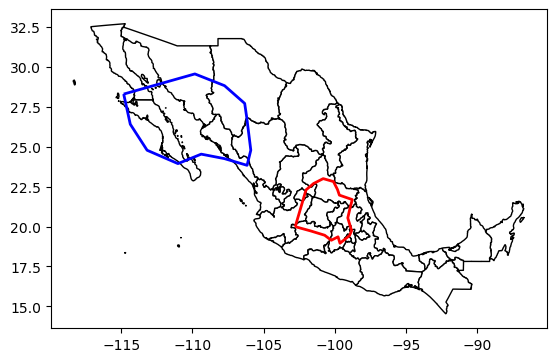

In [21]:
fig, ax= plt.subplots()
merged.plot(ax=ax, color="white", edgecolor="black")
pol1.plot(ax=ax,color="none",edgecolor="red", linewidth=2)
pol2.plot(ax=ax,color="none", edgecolor="blue", linewidth=2)

## Intersección

<Axes: >

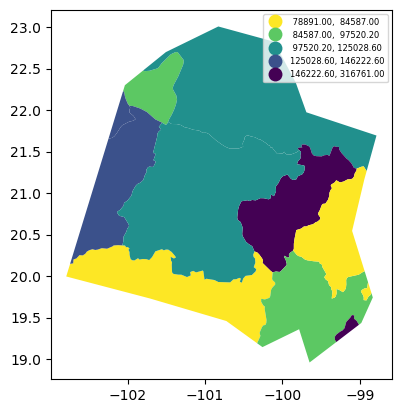

In [22]:
gpd.overlay(merged, pol1, how='intersection').plot(column="pibPC", scheme='quantiles', k=5, cmap='viridis_r',
                                                   legend=True, legend_kwds={'loc': 'upper right','fontsize':6})

In [23]:
gpd.overlay(merged, pol1, how='intersection').head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,...,total_viviendas,sinAlimentos,difAlimentos,lejaniaHospital,aguaDiaria,sinAfiliacion,rezagoEdu,estadoDerecho,techo,geometry
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,...,452914,9.9,45.9,39,43.5,17.0,21.9,44.0,77.5,"POLYGON ((-101.79940 22.47520, -101.77620 22.4..."
1,San Luis Potosí,MX-SLP,Mexico,State,19.2,55.8,45,12,78.7,10.4,...,748392,10.4,51.1,45,55.8,12.0,19.2,39.0,78.7,"POLYGON ((-98.91680 21.26950, -98.95210 21.321..."
2,Querétaro,MX-QUE,Mexico,State,17,85.8,40,18,90.2,8,...,660207,8.0,45.0,40,85.8,18.0,17.0,44.0,90.2,"POLYGON ((-99.04490 21.27230, -99.06950 21.232..."
3,Michoacán,MX-MIC,Mexico,State,29.4,56,40,31,72.7,11.5,...,1282994,11.5,50.9,40,56.0,31.0,29.4,40.0,72.7,"POLYGON ((-100.32410 20.28300, -100.29940 20.2..."
4,México,MX-MEX,Mexico,State,14.1,58,41,28,90.7,12,...,4618111,12.0,54.4,41,58.0,28.0,14.1,36.0,90.7,"POLYGON ((-99.01340 19.41290, -99.04240 19.458..."


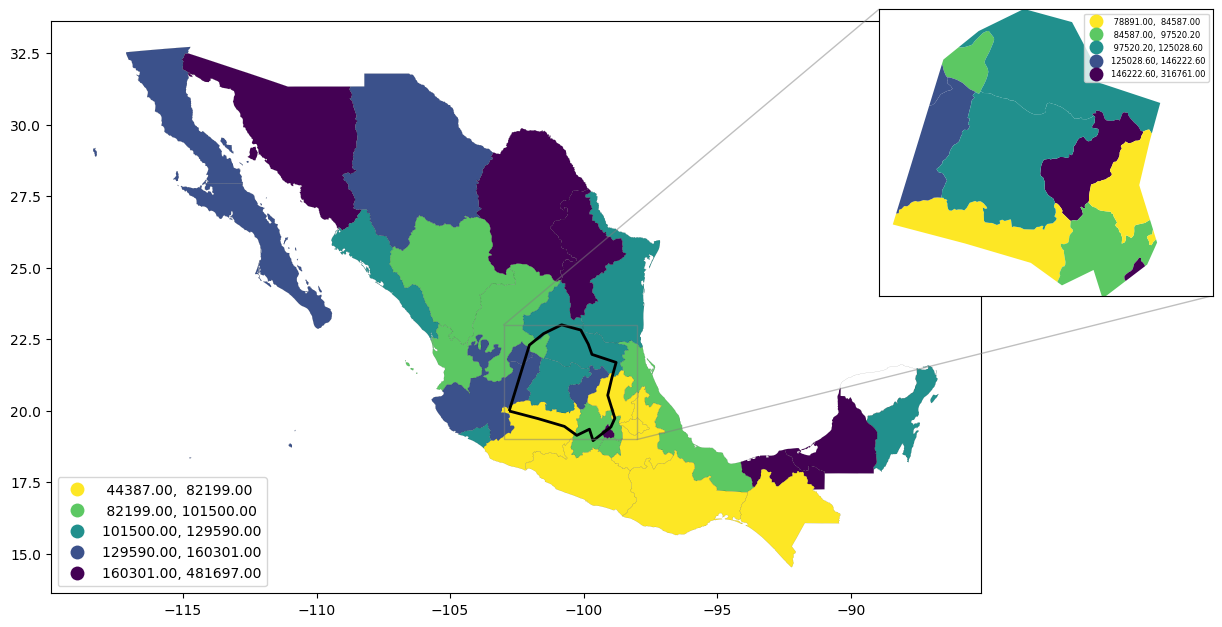

In [24]:
fig, ax = plt.subplots()
# Añade recuadro
axins = ax.inset_axes([0.82, 0.52, 0.5, 0.5])

# Gráfica principal
merged.plot(column='pibPC', legend=True, ax=ax, scheme='quantiles', k=5, cmap='viridis_r', legend_kwds={'loc': 'lower left'})
estados.boundary.plot(lw=0.05, color='k', ax=ax)
pol1.plot(ax=ax,color="none",edgecolor="black", linewidth=2)

# Gráfica recuadro
gpd.overlay(merged, pol1, how='intersection').plot(ax=axins,column="pibPC", scheme='quantiles', k=5, cmap='viridis_r',
                                                   legend=True, legend_kwds={'loc': 'upper right','fontsize':6})

# limita área a mostrar
axins.set(ylabel='', xlabel='', xlim=(-103, -98), ylim=(19, 23), xticks=[], yticks=[])

# Establece líneas del recuadro a la gráfica principal
ax.indicate_inset_zoom(axins)

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)

# Unión

<Axes: >

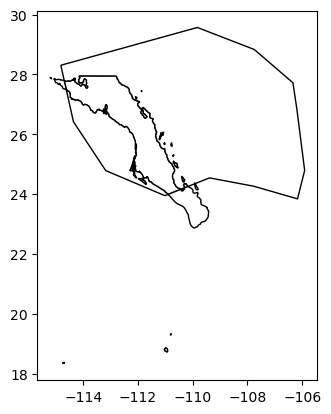

In [25]:
gpd.overlay(merged.query('name=="Baja California Sur"'),pol2, how='union').plot(color="white", edgecolor="black")

In [26]:
gpd.overlay(merged.query('name=="Baja California Sur"'),pol2, how='union')

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,...,total_viviendas,sinAlimentos,difAlimentos,lejaniaHospital,aguaDiaria,sinAfiliacion,rezagoEdu,estadoDerecho,techo,geometry
0,Baja California Sur,MX-BCS,Mexico,State,14.5,23.8,27,16,80.7,15.2,...,245689.0,15.2,49.8,27.0,23.8,16.0,14.5,43.0,80.7,"MULTIPOLYGON (((-109.91445 24.35026, -109.9344..."
1,Baja California Sur,MX-BCS,Mexico,State,14.5,23.8,27,16,80.7,15.2,...,245689.0,15.2,49.8,27.0,23.8,16.0,14.5,43.0,80.7,"MULTIPOLYGON (((-110.42590 24.16320, -110.4177..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.82704 28.30729, -109.8329..."


Diferencia simétrica y diferencia

<Axes: >

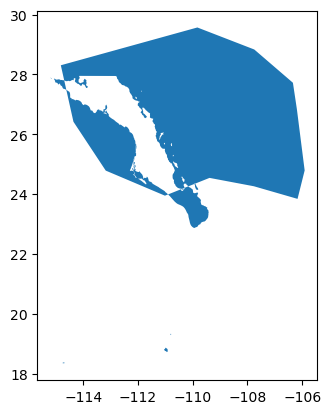

In [27]:
gpd.overlay(merged.query('name=="Baja California Sur"'),pol2, how='symmetric_difference').plot()

<Axes: >

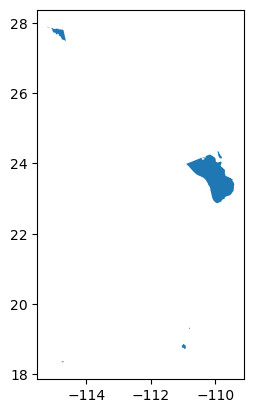

In [28]:
gpd.overlay(merged.query('name=="Baja California Sur"'),pol2, how='difference').plot()